# Effects of Economics & Population Increment on Land Reclamation

This report aims to analyze the correlation between a country's wealth, population growth, and the occurrence of land reclamation. To understand wealth of a country, GDP per capita table will be consulted as well as use of population table for population growth. 

This project seeks to demonstrate why certain regions implement land reclamation strategies, with a focus on three key factors:
- Economic factors
- Population growth
- Land reclamation availability at coast

Basically, increment in population creates a need of land area especially if certain region is small enough such as Hong Kong or Singapore. To fulfill this demand, land reclamation becomes a viable option, but it requires a nation to be sufficiently equipped for its execution. Motivation on land reclamation can be based on business-oriented infrastructure  like building harbour. 

Before diving into analysis, it is important to mention limitations of dataset. In this report, the main focus will be on `Land Area of Countries` table. Data in this table spans from 1961 to 2020. Within this 59 years, multiple occurences happened that can change the land area of countries as well as land reclamation. These phenomenons should be detected to make a healthy analysis. Those occurences are:
- Technological developments that enable more precise measurement of land area via satellites. This improvements may change (negatively or positively) land area significantly especially if the land area is big enough. 
- Floods that can lead loss of land due to sea level increase or from other causes
- Volcanic & Tectonic activies that can create new land

Besides this occurences, there are other examples affecting land area change throughout the years. I will try the examine land reclamation by developing various perspectives to prevent those phenomenons to interfere analysis of the project. 

## Countries to Choose
When considering a country's stance on land reclamation, it can be helpful to categorize countries into four distinct groups to determine what country is prone to structe land reclamation. Countries can be categorized as:
- Landlocked countries which does not have any coast or major lake to structure land reclamation,
- Countries having cities at coast with relatively low population density & sufficient area
- Countries having small sized cities at coast with high urban population density 
- Regions at coast that are city-states or exhibit city-state characteristics (very-high population density within small area)

Considering two distinct countries, Ethiopia and Singapore, demonstrates the contrast between the first and fourth categories mentioned. Ethiopia, being landlocked and lacking a coastline or significant inland water bodies, does not have the opportunity to engage in large-scale land reclamation projects. In contrast, Singapore is densely populated and faces the challenge of limited available land for expanding its facilities and infrastructure. Due to this scarcity of land, land reclamation activities in Singapore are highly feasible.

When land reclamation projects implemented in inland water of a countries are researched, we see that there are limited implementations that are not large scale due to ecological and hydrological considerations. Therefore, we can exclude landlocked countries having major inland lake because even though there is land reclamation, the scale is small. This circumstance induces nothing but a minor error in the analysis. 

To understand which country to include to the analysis, a score computation approach can be developed that considers above categories as well as limitations that is mentioned before.

### Filter Landlocked Countries
As a first indicator, we can consider a dataset that displays countries' coast length. This information will enable us to exclude countries having no coast line if the coastline value in database is zero.

_Note: To keep the queries shorter, I generate virtual tables like `countries_landlocked` to reach specific countries._

In [26]:
# Library Importations & Database connection

import psycopg2
import geopandas as gpd
import psycopg2
import matplotlib.pyplot as plt

# Establish a database connection
def connect_surface_area_db():
    return psycopg2.connect(
        dbname="country_surface_area",
        user="postgres",
        password="3204965",
        host="localhost",
        port="5432"
    )

def execute_query(query):
    conn = connect_surface_area_db()
    cursor = conn.cursor()
    cursor.execute(query)
    highlighted_iso_codes = [row[0] for row in cursor.fetchall()]
    conn.close()
    return highlighted_iso_codes

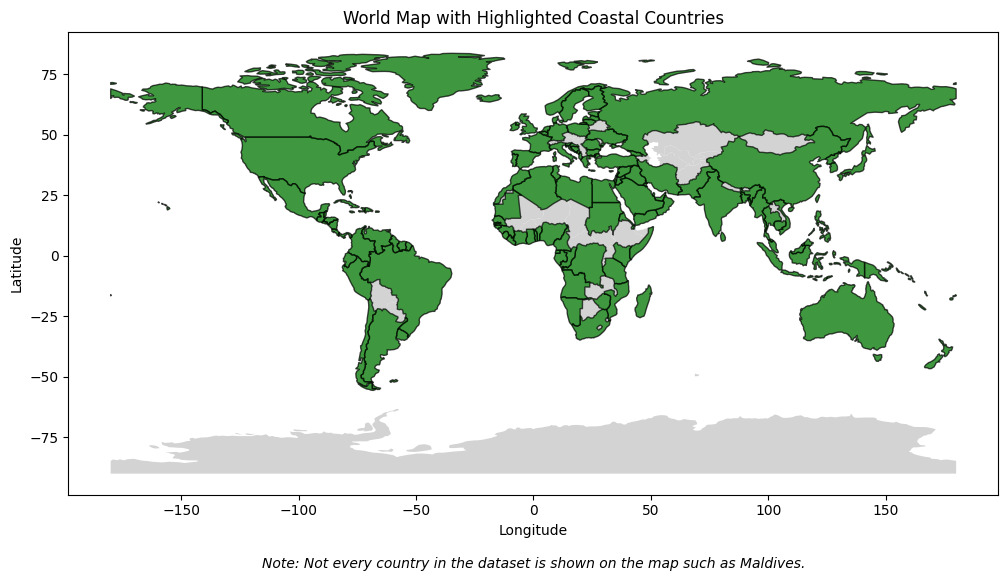

In [54]:
# Load the world dataset
world_map_url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'

# Load the world dataset from the URL
world = gpd.read_file(world_map_url)

# Execute the query to get highlighted countries' ISO codes
query = """SELECT iso_code FROM countries_coastal;"""
highlighted_iso_codes = execute_query(query)

# Filter the world geometries to include only the highlighted countries
highlighted_world = world[world['ADM0_A3'].isin(highlighted_iso_codes)]

# Plot the world map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the world map first as the background
world.plot(ax=ax, color='lightgrey')

# Plot the highlighted countries on top of the world map
highlighted_world.plot(ax=ax, color='green', edgecolor='black', alpha=0.7, label='Highlighted Countries')

# Customize the plot
ax.set_title('World Map with Highlighted Coastal Countries')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

note = "Note: Not every country in the dataset is shown on the map such as Maldives."
ax.text(0.5, -0.15, note, transform=ax.transAxes, fontsize=10, ha='center', va='center', fontstyle='italic')

# Show the plot
plt.show()

### Focusing on Motivation Behind Land Reclamation

There are multiple reasons to structure land reclamation in a country. Most prominent purposes are are listed as follows:
- **Urban Development:** Creating space for housing, infrastructure, and commercial areas in densely populated urban areas.
- **Industrial and Commercial Activities:** Providing land for industrial complexes, ports, and other economic activities such as harbours.
- **Agriculture:** Converting unusable land into fertile agricultural areas to enhance food production.